In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score

In [3]:
train_data = pd.read_csv('home-data-for-ml-course/train.csv', index_col='Id')
test_data = pd.read_csv('home-data-for-ml-course/test.csv', index_col='Id')

In [4]:
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data['SalePrice']
train_data.drop(['SalePrice'], axis=1, inplace=True)

In [5]:
# Separate numeric from categorical columns
numeric_cols = [col for col in train_data.columns
               if train_data[col].dtype in ['int64', 'float64']]

categorical_cols = [col for col in train_data.columns
                   if train_data[col].dtype == 'object'
                   and train_data[col].nunique() < 10]

select_cols = numeric_cols + categorical_cols
X = train_data[select_cols].copy()
X_test = test_data[select_cols].copy()

In [6]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [33]:
# Create the Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

numeric_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric_cols),
    ('categorical', categorical_transformer, categorical_cols)
])


In [48]:
def evaluate_estimator(n_estimators):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)

    pipeline = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', model)
    ])

    scores = -1 * cross_val_score(pipeline, X, y, cv=3, scoring='neg_mean_absolute_error')

    return scores.mean()

In [63]:
results = {}

for i in range(1,8):
    results[i*50] = evaluate_estimator(i*50)

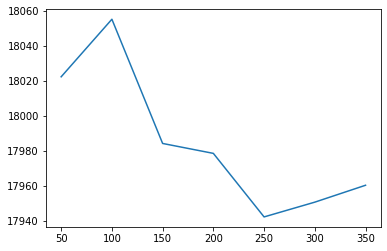

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show() # Takes about a minute